In [1]:
import keras
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
def plotData(history, metric):
    train_metrics = history.history[metric]
    validation_metrics = history.history["val_" + metric]

    epochs = range(1, len(train_metrics)+1)

    plt.plot(epochs, train_metrics)
    plt.plot(epochs, validation_metrics)

    plt.title("Training & Validation"+ metric)

    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, "val_"+metric])
    plt.show()

In [3]:
def plotLR(history):
    learning_rate = history.history["lr"]

    epochs = range(1, len(learning_rate) +1)

    plt.plot(epochs, learning_rate)

    plt.title("learning_rate" )

    plt.xlabel("Epochs")
    plt.ylabel("Learning Rate") 
    plt.show()

In [4]:
from keras.datasets import mnist

(train_images, train_labels ) = mnist.load_data()[0]
(test_images,  test_labels)   = mnist.load_data()[1]

In [5]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [6]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten

def mnist_model():
    model = Sequential([
        Conv2D(28, kernel_size=(3,3), input_shape =(28,28,1)),
        MaxPooling2D(pool_size=(2,2)),
        Flatten(),
        Dense(128, activation="relu"),
        Dropout(rate=0.2),
        Dense(10, activation="softmax")
         
    ])
    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics="accuracy")

    return model

In [13]:
model = mnist_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 28)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 4732)              0         
                                                                 
 dense_6 (Dense)             (None, 128)               605824    
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                      

Early stop

In [14]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping()
history_early_stopping = model.fit(x=train_images, y=train_labels, epochs= 50, validation_split=0.2, batch_size=64, verbose=2, callbacks=[early_stopping])


Epoch 1/50
750/750 - 8s - loss: 1.2733 - accuracy: 0.8372 - val_loss: 0.2927 - val_accuracy: 0.9306 - 8s/epoch - 11ms/step
Epoch 2/50
750/750 - 3s - loss: 0.3455 - accuracy: 0.9107 - val_loss: 0.1975 - val_accuracy: 0.9572 - 3s/epoch - 4ms/step


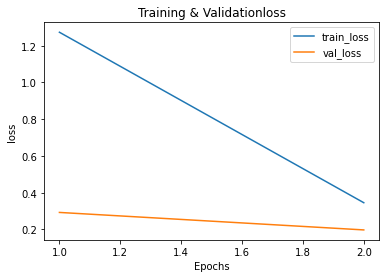

In [15]:
plotData(history_early_stopping,"loss")

In [17]:
model = mnist_model() 
early_stopping1 = EarlyStopping(monitor="val_accuracy", patience=3, min_delta=0.001,  mode="auto")
history_early_stopping1 = model.fit(x=train_images, y=train_labels, epochs= 50, validation_split=0.2, batch_size=64, verbose=2, callbacks=[early_stopping1])

Epoch 1/50
750/750 - 6s - loss: 1.2027 - accuracy: 0.8279 - val_loss: 0.2866 - val_accuracy: 0.9312 - 6s/epoch - 8ms/step
Epoch 2/50
750/750 - 3s - loss: 0.3104 - accuracy: 0.9129 - val_loss: 0.1792 - val_accuracy: 0.9573 - 3s/epoch - 5ms/step
Epoch 3/50
750/750 - 6s - loss: 0.2217 - accuracy: 0.9359 - val_loss: 0.1703 - val_accuracy: 0.9564 - 6s/epoch - 8ms/step
Epoch 4/50
750/750 - 3s - loss: 0.1860 - accuracy: 0.9470 - val_loss: 0.1309 - val_accuracy: 0.9681 - 3s/epoch - 4ms/step
Epoch 5/50
750/750 - 3s - loss: 0.1664 - accuracy: 0.9529 - val_loss: 0.1270 - val_accuracy: 0.9702 - 3s/epoch - 4ms/step
Epoch 6/50
750/750 - 4s - loss: 0.1560 - accuracy: 0.9551 - val_loss: 0.1293 - val_accuracy: 0.9682 - 4s/epoch - 5ms/step
Epoch 7/50
750/750 - 4s - loss: 0.1303 - accuracy: 0.9616 - val_loss: 0.1175 - val_accuracy: 0.9691 - 4s/epoch - 5ms/step
Epoch 8/50
750/750 - 3s - loss: 0.1244 - accuracy: 0.9646 - val_loss: 0.1129 - val_accuracy: 0.9718 - 3s/epoch - 4ms/step
Epoch 9/50
750/750 - 3s 

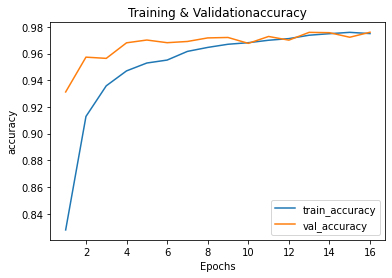

In [18]:
plotData(history_early_stopping1,"accuracy")

CSV Loger

In [19]:
from keras.callbacks import CSVLogger

csv = CSVLogger("logs/result.csv")
model = mnist_model() 

history_csv_logger = model.fit(x=train_images, y=train_labels, epochs= 50, validation_split=0.2, batch_size=64, verbose=2, callbacks=[csv])

Epoch 1/50
750/750 - 9s - loss: 1.2124 - accuracy: 0.8307 - val_loss: 0.2501 - val_accuracy: 0.9391 - 9s/epoch - 12ms/step
Epoch 2/50
750/750 - 8s - loss: 0.3212 - accuracy: 0.9147 - val_loss: 0.1776 - val_accuracy: 0.9568 - 8s/epoch - 11ms/step
Epoch 3/50
750/750 - 8s - loss: 0.2247 - accuracy: 0.9379 - val_loss: 0.1562 - val_accuracy: 0.9612 - 8s/epoch - 11ms/step
Epoch 4/50
750/750 - 8s - loss: 0.1929 - accuracy: 0.9458 - val_loss: 0.1350 - val_accuracy: 0.9661 - 8s/epoch - 11ms/step
Epoch 5/50
750/750 - 5s - loss: 0.1658 - accuracy: 0.9531 - val_loss: 0.1543 - val_accuracy: 0.9598 - 5s/epoch - 6ms/step
Epoch 6/50
750/750 - 4s - loss: 0.1482 - accuracy: 0.9582 - val_loss: 0.1226 - val_accuracy: 0.9697 - 4s/epoch - 6ms/step
Epoch 7/50
750/750 - 7s - loss: 0.1328 - accuracy: 0.9624 - val_loss: 0.1274 - val_accuracy: 0.9688 - 7s/epoch - 10ms/step
Epoch 8/50
750/750 - 4s - loss: 0.1273 - accuracy: 0.9640 - val_loss: 0.1322 - val_accuracy: 0.9731 - 4s/epoch - 5ms/step
Epoch 9/50
750/750 

In [21]:
import pandas as pd
data = pd.read_csv("./logs/result.csv", index_col="epoch")
data

,accuracy,loss,val_accuracy,val_loss
epoch,,,,
0,0.830688,1.212396,0.939083,0.250117
1,0.914688,0.321204,0.956833,0.177622
2,0.937937,0.224746,0.961167,0.156202
3,0.945813,0.192920,0.966083,0.134975
4,0.953083,0.165759,0.959833,0.154252
5,0.958167,0.148159,0.969750,0.122559
6,0.962375,0.132804,0.968750,0.127429
7,0.964021,0.127347,0.973083,0.132196
8,0.965917,0.118009,0.972833,0.131397


In [22]:
from keras.callbacks import ModelCheckpoint
filepath = "./models/"
checkpoint = ModelCheckpoint(filepath=filepath, save_freq="epoch", save_weights_only=True, verbose=1)

model = mnist_model() 

history_checkpoint = model.fit(x=train_images, y=train_labels, epochs= 25, validation_split=0.2, batch_size=64, verbose=2, callbacks=[checkpoint])

Epoch 1/25

Epoch 1: saving model to ./models\
750/750 - 5s - loss: 1.0627 - accuracy: 0.8385 - val_loss: 0.2599 - val_accuracy: 0.9347 - 5s/epoch - 6ms/step
Epoch 2/25

Epoch 2: saving model to ./models\
750/750 - 4s - loss: 0.3237 - accuracy: 0.9145 - val_loss: 0.1773 - val_accuracy: 0.9569 - 4s/epoch - 5ms/step
Epoch 3/25

Epoch 3: saving model to ./models\
750/750 - 3s - loss: 0.2255 - accuracy: 0.9380 - val_loss: 0.1642 - val_accuracy: 0.9571 - 3s/epoch - 4ms/step
Epoch 4/25

Epoch 4: saving model to ./models\
750/750 - 3s - loss: 0.1821 - accuracy: 0.9494 - val_loss: 0.1514 - val_accuracy: 0.9668 - 3s/epoch - 4ms/step
Epoch 5/25

Epoch 5: saving model to ./models\
750/750 - 7s - loss: 0.1541 - accuracy: 0.9575 - val_loss: 0.1453 - val_accuracy: 0.9657 - 7s/epoch - 9ms/step
Epoch 6/25

Epoch 6: saving model to ./models\
750/750 - 3s - loss: 0.1370 - accuracy: 0.9617 - val_loss: 0.1564 - val_accuracy: 0.9657 - 3s/epoch - 5ms/step
Epoch 7/25

Epoch 7: saving model to ./models\
750/7

ReduceLROnPlateu

In [23]:
from keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor="val_loss",factor=0.2,  patience=2, min_lr=0.001, verbose=2) # patience 0, min_lr del

model = mnist_model() 

history_reduce_lr = model.fit(x=train_images, y=train_labels, epochs= 50, validation_split=0.2, batch_size=64, verbose=2, callbacks=[reduce_lr])

Epoch 1/50
750/750 - 5s - loss: 0.9611 - accuracy: 0.8465 - val_loss: 0.2427 - val_accuracy: 0.9382 - lr: 0.0010 - 5s/epoch - 7ms/step
Epoch 2/50
750/750 - 4s - loss: 0.2844 - accuracy: 0.9231 - val_loss: 0.1655 - val_accuracy: 0.9576 - lr: 0.0010 - 4s/epoch - 5ms/step
Epoch 3/50
750/750 - 3s - loss: 0.1995 - accuracy: 0.9450 - val_loss: 0.1531 - val_accuracy: 0.9622 - lr: 0.0010 - 3s/epoch - 5ms/step
Epoch 4/50
750/750 - 3s - loss: 0.1619 - accuracy: 0.9542 - val_loss: 0.1515 - val_accuracy: 0.9657 - lr: 0.0010 - 3s/epoch - 4ms/step
Epoch 5/50
750/750 - 3s - loss: 0.1554 - accuracy: 0.9563 - val_loss: 0.1640 - val_accuracy: 0.9679 - lr: 0.0010 - 3s/epoch - 5ms/step
Epoch 6/50
750/750 - 3s - loss: 0.1414 - accuracy: 0.9600 - val_loss: 0.1304 - val_accuracy: 0.9712 - lr: 0.0010 - 3s/epoch - 4ms/step
Epoch 7/50
750/750 - 3s - loss: 0.1231 - accuracy: 0.9656 - val_loss: 0.1174 - val_accuracy: 0.9715 - lr: 0.0010 - 3s/epoch - 4ms/step
Epoch 8/50
750/750 - 4s - loss: 0.1227 - accuracy: 0.96

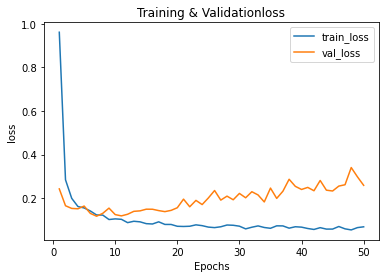

In [25]:
plotData(history_reduce_lr, "loss")

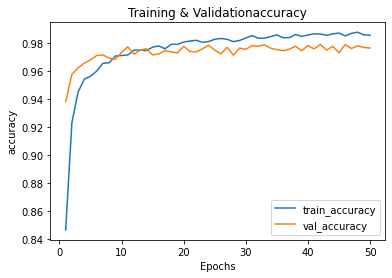

In [27]:
plotData(history_reduce_lr, "accuracy")

 LearningRateSchecular

In [29]:
from keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

lr_scheduler = LearningRateScheduler(scheduler, verbose=1)
model = mnist_model() 

history_lr_scheduler = model.fit(x=train_images, y=train_labels, epochs= 50, validation_split=0.2, batch_size=64, verbose=2, callbacks=[lr_scheduler])


Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/50
750/750 - 5s - loss: 0.9671 - accuracy: 0.8353 - val_loss: 0.2597 - val_accuracy: 0.9331 - lr: 0.0010 - 5s/epoch - 6ms/step

Epoch 2: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/50
750/750 - 4s - loss: 0.2899 - accuracy: 0.9195 - val_loss: 0.1829 - val_accuracy: 0.9549 - lr: 0.0010 - 4s/epoch - 5ms/step

Epoch 3: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 3/50
750/750 - 4s - loss: 0.2085 - accuracy: 0.9407 - val_loss: 0.1420 - val_accuracy: 0.9653 - lr: 0.0010 - 4s/epoch - 5ms/step

Epoch 4: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 4/50
750/750 - 4s - loss: 0.1715 - accuracy: 0.9511 - val_loss: 0.1505 - val_accuracy: 0.9657 - lr: 0.0010 - 4s/epoch - 5ms/step

Epoch 5: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 5/50
750/750 - 6s - loss: 0.1474 - accuracy: 0.9583 - 

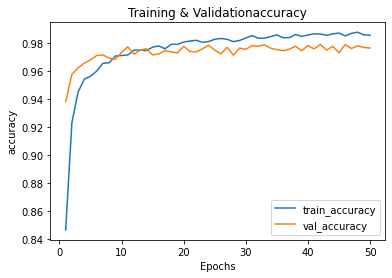

In [30]:
plotData(history_reduce_lr, "accuracy")

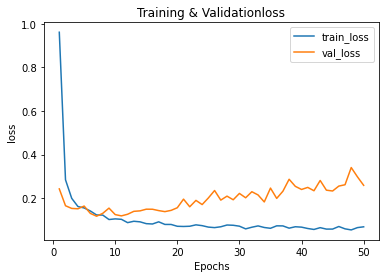

In [31]:
plotData(history_reduce_lr, "loss")

In [32]:
from keras.callbacks import TensorBoard
import time
time = time.strftime("%Y_%M_%D_%H_%M_%S")
tensorboard = TensorBoard(log_dir=f"./logs/tensorboard/{time}", batch_size = 64, histogram_freq=1 )

model = mnist_model()  

history_tensorboard = model.fit(x=train_images, y=train_labels, epochs= 50, validation_split=0.2, batch_size=64, verbose=2, callbacks=[tensorboard])

Epoch 1/50
750/750 - 7s - loss: 0.9734 - accuracy: 0.8251 - val_loss: 0.2545 - val_accuracy: 0.9371 - 7s/epoch - 9ms/step
Epoch 2/50
750/750 - 4s - loss: 0.3038 - accuracy: 0.9154 - val_loss: 0.1707 - val_accuracy: 0.9551 - 4s/epoch - 5ms/step
Epoch 3/50
750/750 - 4s - loss: 0.2150 - accuracy: 0.9381 - val_loss: 0.1481 - val_accuracy: 0.9647 - 4s/epoch - 6ms/step
Epoch 4/50
750/750 - 4s - loss: 0.1715 - accuracy: 0.9500 - val_loss: 0.1373 - val_accuracy: 0.9636 - 4s/epoch - 5ms/step
Epoch 5/50
750/750 - 4s - loss: 0.1511 - accuracy: 0.9554 - val_loss: 0.1250 - val_accuracy: 0.9699 - 4s/epoch - 5ms/step
Epoch 6/50
750/750 - 4s - loss: 0.1361 - accuracy: 0.9607 - val_loss: 0.1045 - val_accuracy: 0.9736 - 4s/epoch - 6ms/step
Epoch 7/50
750/750 - 10s - loss: 0.1231 - accuracy: 0.9635 - val_loss: 0.1197 - val_accuracy: 0.9713 - 10s/epoch - 13ms/step
Epoch 8/50
750/750 - 9s - loss: 0.1208 - accuracy: 0.9661 - val_loss: 0.1145 - val_accuracy: 0.9707 - 9s/epoch - 12ms/step
Epoch 9/50
750/750 -

In [33]:
print("tensorboard --logdir="+tensorboard.log_dir)

tensorboard --logdir=./logs/tensorboard/2022_53_07/22/22_22_53_49
